# HW2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

- Get the time series for the following cryptocurrencies from `cryptowat.ch` starting from 2021-11-22, hourly data
    1. ETH
    2. SOL
    3. AVAX
    4. USDT
    5. FLOW

In [2]:
def get_data(token):
    if token.upper() == 'FLOW':
        exchange = 'kraken'
    else: 
        exchange = 'coinbase-pro'
        
    res = requests.get(
        f'https://api.cryptowat.ch/markets/{exchange}/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [3]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT', 'FLOW']

In [4]:
df = pd.concat(get_data(token) for token in tokens)

In [5]:
df.set_index('ts', inplace=True)

In [6]:
df

,open,high,low,close,volume,volumeUSD,token
ts,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH
...,...,...,...,...,...,...,...
2021-12-20 14:00:00,8.034,8.102,8.034,8.082,9405.328266,7.597483e+04,FLOW
2021-12-20 15:00:00,8.064,8.093,8.011,8.093,28745.660629,2.313734e+05,FLOW
2021-12-20 16:00:00,8.094,8.094,8.065,8.065,1810.701306,1.462834e+04,FLOW


In [7]:
[df[df.token == token] for token in tokens]

[                        open     high      low    close        volume  \
 ts                                                                      
 2021-11-22 00:00:00  4317.98  4342.24  4246.07  4262.99   7262.562789   
 2021-11-22 01:00:00  4263.04  4270.34  4212.45  4234.37   8437.946084   
 2021-11-22 02:00:00  4234.87  4246.72  4171.17  4217.89   9259.725370   
 2021-11-22 03:00:00  4217.88  4223.48  4163.58  4193.47   9259.899519   
 2021-11-22 04:00:00  4192.95  4213.59  4147.00  4168.35   7934.546906   
 ...                      ...      ...      ...      ...           ...   
 2021-12-20 14:00:00  3782.85  3811.00  3766.88  3776.87   5356.147003   
 2021-12-20 15:00:00  3777.07  3848.53  3754.80  3840.19  17507.992019   
 2021-12-20 16:00:00  3838.73  3842.00  3794.17  3801.41   6336.438977   
 2021-12-20 17:00:00  3801.69  3851.86  3792.71  3850.96  11134.530966   
 2021-12-20 18:00:00  3851.41  3863.03  3824.79  3836.81   4052.108325   
 
                         volumeUSD t

- Get the total USD volume traded for each token in a dataframe, sorted from highest volume to lowest volume

In [8]:
total_usd_vol = df.groupby('token')['volumeUSD'].sum().to_frame().sort_values('volumeUSD', ascending=False)
total_usd_vol

,volumeUSD
token,
ETH,2.558466e+10
SOL,8.365068e+09
AVAX,4.584819e+09
USDT,2.311771e+09
FLOW,9.804790e+07


- Add a column that calculates the close price ratio between ETH and SOL for each house (i.e. close price of ETH / close price of SOL for each period)

In [9]:
df['close_price_ratio_ETH_SOL'] = df.close[df.token == 'ETH'] / df.close[df.token == 'SOL']
df

,open,high,low,close,volume,volumeUSD,token,close_price_ratio_ETH_SOL
ts,,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,18.471694
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,18.736150
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,18.577985
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,18.794937
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,18.891059
...,...,...,...,...,...,...,...,...
2021-12-20 14:00:00,8.034,8.102,8.034,8.082,9405.328266,7.597483e+04,FLOW,22.207738
2021-12-20 15:00:00,8.064,8.093,8.011,8.093,28745.660629,2.313734e+05,FLOW,22.170718
2021-12-20 16:00:00,8.094,8.094,8.065,8.065,1810.701306,1.462834e+04,FLOW,22.359920


- Change the name of the `volume` and `volumeUSD` columns to `volumeBase` and `volumeTerm`

In [10]:
df.rename(columns={'volume': 'volumeBase', 'volumeUSD': 'volumeTerm'}, inplace=True)
df

,open,high,low,close,volumeBase,volumeTerm,token,close_price_ratio_ETH_SOL
ts,,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,18.471694
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,18.736150
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,18.577985
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,18.794937
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,18.891059
...,...,...,...,...,...,...,...,...
2021-12-20 14:00:00,8.034,8.102,8.034,8.082,9405.328266,7.597483e+04,FLOW,22.207738
2021-12-20 15:00:00,8.064,8.093,8.011,8.093,28745.660629,2.313734e+05,FLOW,22.170718
2021-12-20 16:00:00,8.094,8.094,8.065,8.065,1810.701306,1.462834e+04,FLOW,22.359920


- create a fat table indexed by the timestamp, and each column is the close price of each token (i.e. this should be a table of  200 rows and 5 columns)

In [11]:
close = df.reset_index().pivot(index='ts', columns='token', values='close')
close

token,AVAX,ETH,FLOW,SOL,USDT
ts,,,,,
2021-11-22 00:00:00,128.67,4262.99,14.150,230.785,1.0012
2021-11-22 01:00:00,134.85,4234.37,13.621,226.000,1.0013
2021-11-22 02:00:00,132.54,4217.89,13.753,227.037,1.0012
2021-11-22 03:00:00,133.38,4193.47,13.652,223.117,1.0011
2021-11-22 04:00:00,136.29,4168.35,13.581,220.652,1.0009
...,...,...,...,...,...
2021-12-20 14:00:00,103.07,3776.87,8.082,170.070,1.0002
2021-12-20 15:00:00,104.74,3840.19,8.093,173.210,1.0002
2021-12-20 16:00:00,103.96,3801.41,8.065,170.010,1.0002


- calculate the hour by hour log return of the close price of each token (return is calculated by np.log(price_t / price_{t-1}))

In [12]:
log_return = np.log(close / close.shift(1))
log_return

token,AVAX,ETH,FLOW,SOL,USDT
ts,,,,,
2021-11-22 00:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-22 01:00:00,0.046912,-0.006736,-0.038102,-0.020952,0.0001
2021-11-22 02:00:00,-0.017279,-0.003900,0.009644,0.004578,-0.0001
2021-11-22 03:00:00,0.006318,-0.005806,-0.007371,-0.017417,-0.0001
2021-11-22 04:00:00,0.021583,-0.006008,-0.005214,-0.011109,-0.0002
...,...,...,...,...,...
2021-12-20 14:00:00,-0.003390,-0.001585,0.003967,-0.001234,-0.0001
2021-12-20 15:00:00,0.016073,0.016626,0.001360,0.018295,0.0000
2021-12-20 16:00:00,-0.007475,-0.010150,-0.003466,-0.018647,0.0000


- \[Stretch\] calculate the correlation of the tokens using the table above

In [13]:
log_return.corr()

token,AVAX,ETH,FLOW,SOL,USDT
token,,,,,
AVAX,1.000000,0.657210,0.403881,0.647939,0.015339
ETH,0.657210,1.000000,0.579678,0.762714,-0.086700
FLOW,0.403881,0.579678,1.000000,0.476557,-0.175695
SOL,0.647939,0.762714,0.476557,1.000000,0.104757
USDT,0.015339,-0.086700,-0.175695,0.104757,1.000000


- \[Stretch\] visualize the correlation in a matplpotlib plot

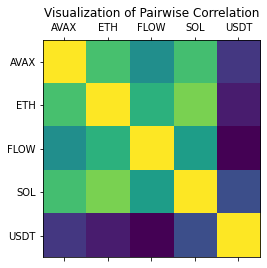

In [14]:
_, ax = plt.subplots(1,1)

ax.matshow(log_return.corr())
ax.set_xticks(np.arange(5))
ax.set_xticklabels(sorted(tokens))
ax.set_yticks(np.arange(5))
ax.set_yticklabels(sorted(tokens))
ax.set_title('Visualization of Pairwise Correlation')

plt.show()